# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

### читаем данные

In [2]:
df_geo_comment =  pd.read_excel('geo_comment.xlsx')

In [3]:
# df_geo_comment.head()

In [4]:
df_geo =  pd.read_excel('geo.xlsx')

In [5]:
# df_geo.head()

In [6]:
# df_geo_comment.multiplier.value_counts()

# Обязательное задание

# визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
X = df_geo.loc[:,('x','y')]

In [10]:
X.x, X.y = X.x.round(2), X.y.round(2)

In [11]:
X_scaled = scaler.fit_transform(X)

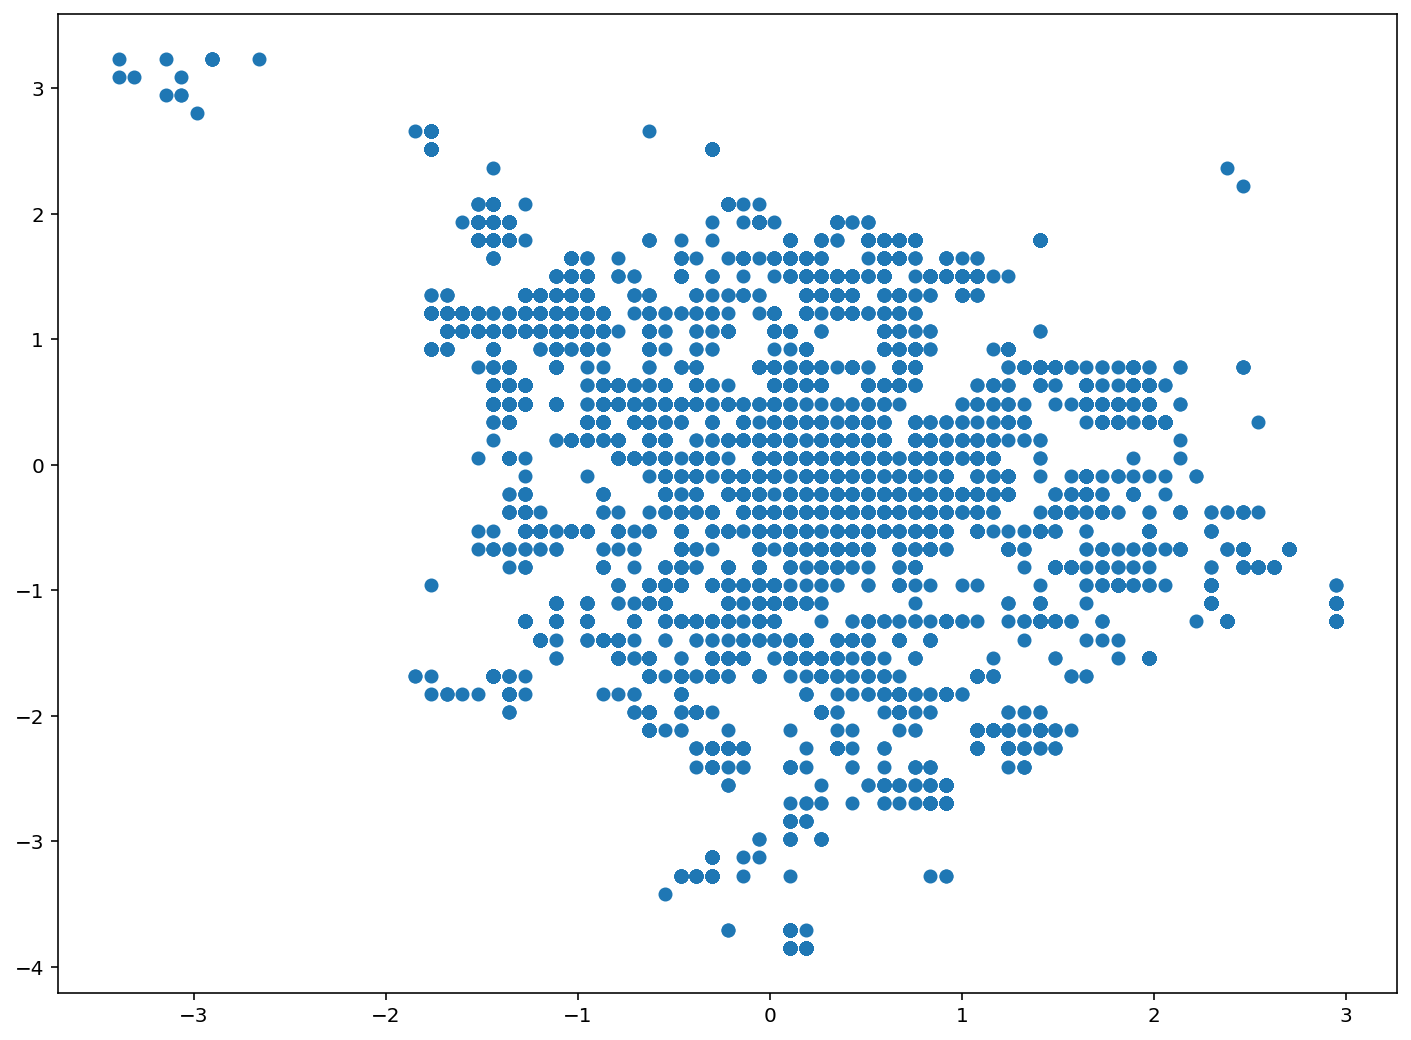

In [12]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])

In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

### KMeans

In [14]:
n = 8

In [15]:
KMeans_clusters = KMeans(n_clusters=n).fit_predict(X_scaled)

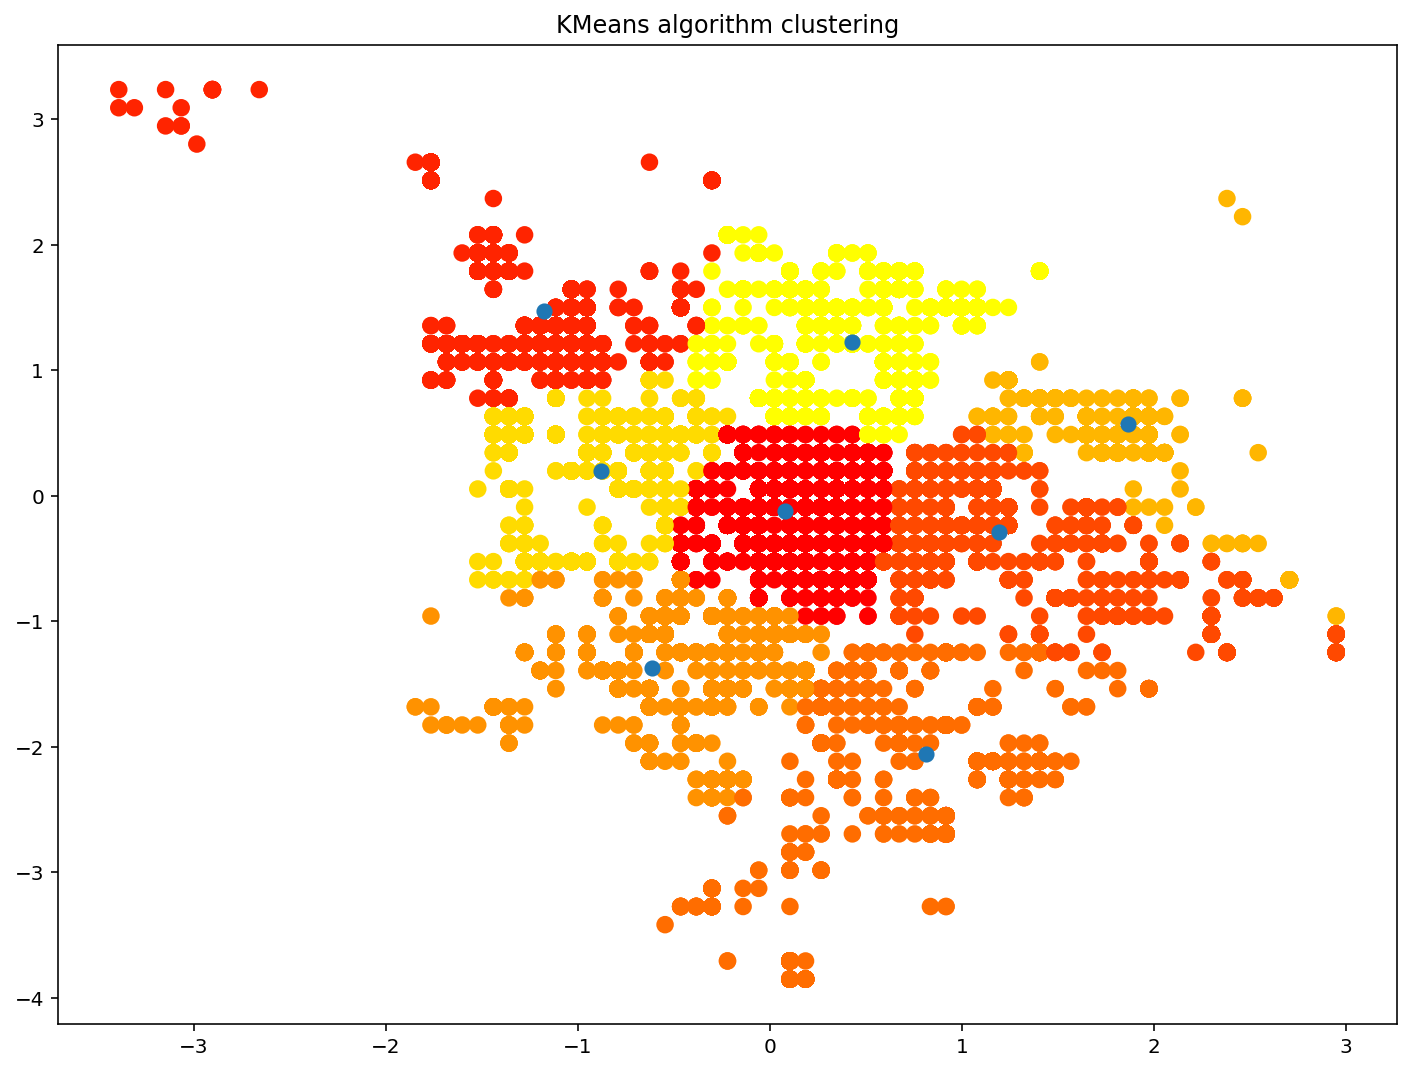

In [16]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=KMeans_clusters, cmap='autumn', s=60)
plt.title('KMeans algorithm clustering')
centers = KMeans(n_clusters=n).fit(X_scaled).cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=50)

### НЕ СМОГ ИЗ МЕТОДА fit_predict ВЫТАЩИТЬ КООРДИНАТЫ ЦЕНТРОВ. :( 
### Пришлось дважды обучать модель. Либо только разбивать отдельно на fit и на predict? 

### DBSCAN

In [17]:
DBSCAN_clusters = DBSCAN(eps=0.1, min_samples=3).fit_predict(X_scaled)

Text(0.5, 1.0, 'DBSCAN algorithm clustering')

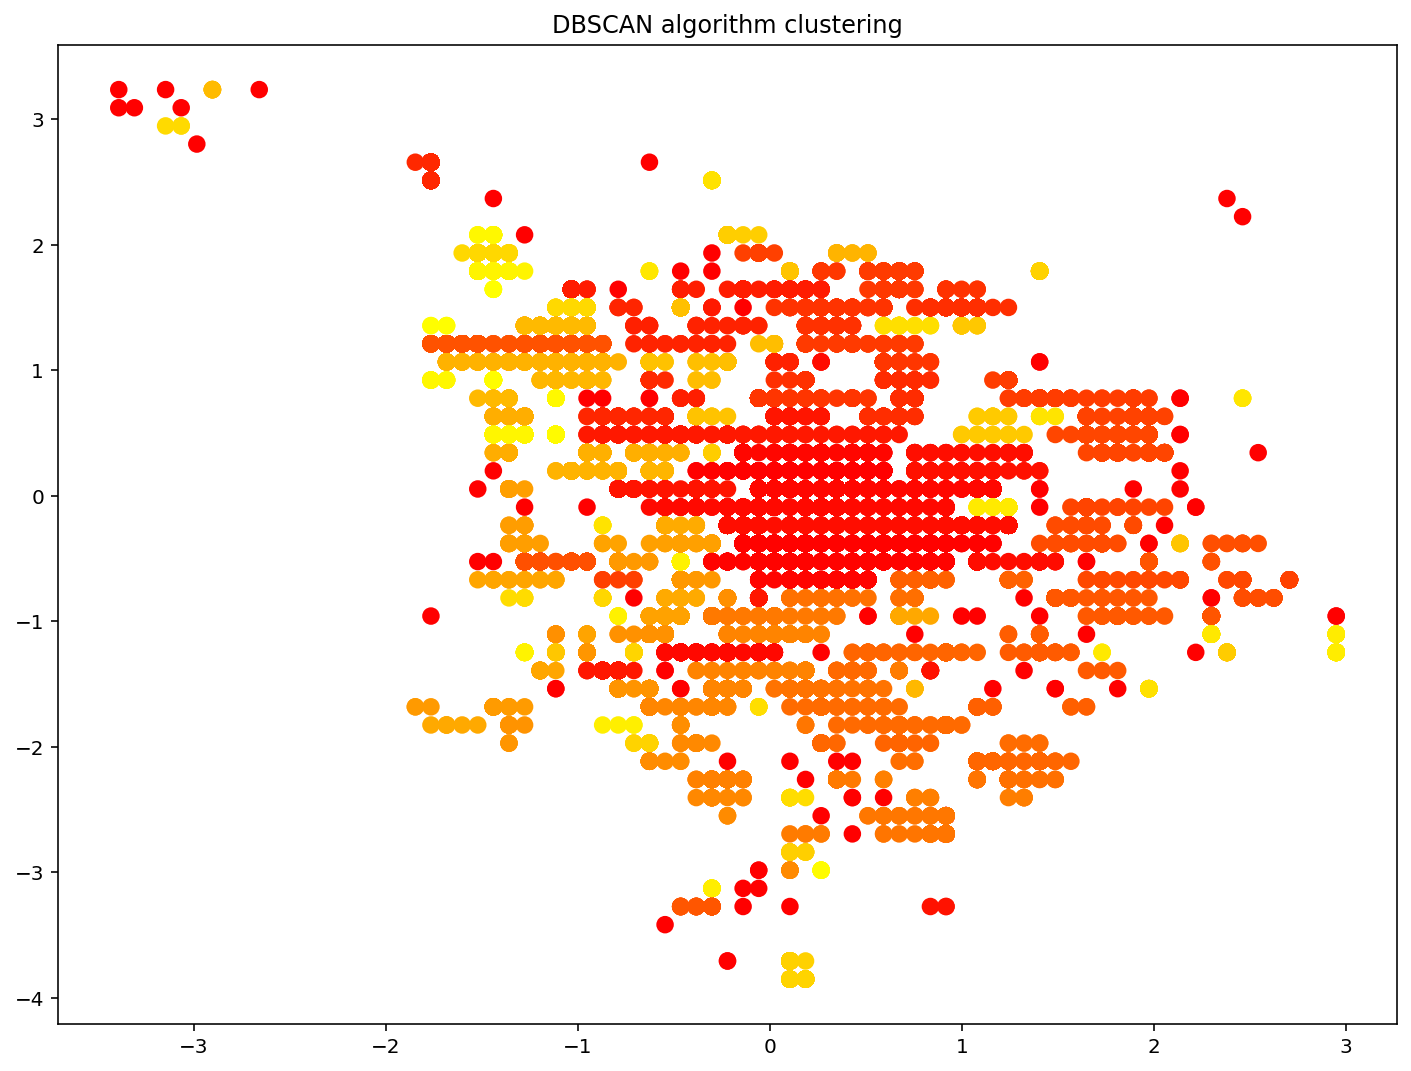

In [18]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=DBSCAN_clusters, cmap='autumn', s=60)
plt.title('DBSCAN algorithm clustering')

### AffinityPropagation

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
### AffinityPropagation & AgglomerativeClustering на голом датасете требуют просто космический объем памяти. 
### Округление данных до int не решает проблему, при этом погрешность в расстояниях станет очень большая. 
### Для проверки алгоритма сгенерировал сэмпл данных из 20к записей

In [21]:
df_sample = X.sample(n=20000)

In [22]:
X_sample_scaled = scaler.fit_transform(df_sample)

In [23]:
# AffinityPropagation_clusters = AffinityPropagation().fit_predict(X_sample_scaled)

In [24]:
# plt.scatter(X_sample_scaled[:, 0], X_sample_scaled[:, 1], c=AffinityPropagation_clusters, cmap='autumn', s=60)
# plt.title('AffinityPropagation algorithm clustering votes')
# centers = AffinityPropagation().fit(X_sample_scaled).cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], s=50)

In [25]:
### AffinityPropagation на датасете больше 1к уходит в бесконечность :(

### AgglomerativeClustering

In [26]:
AgglomerativeClustering_clusters = AgglomerativeClustering(n_clusters=5).fit_predict(X_sample_scaled)

Text(0.5, 1.0, 'AgglomerativeClustering algorithm clustering votes')

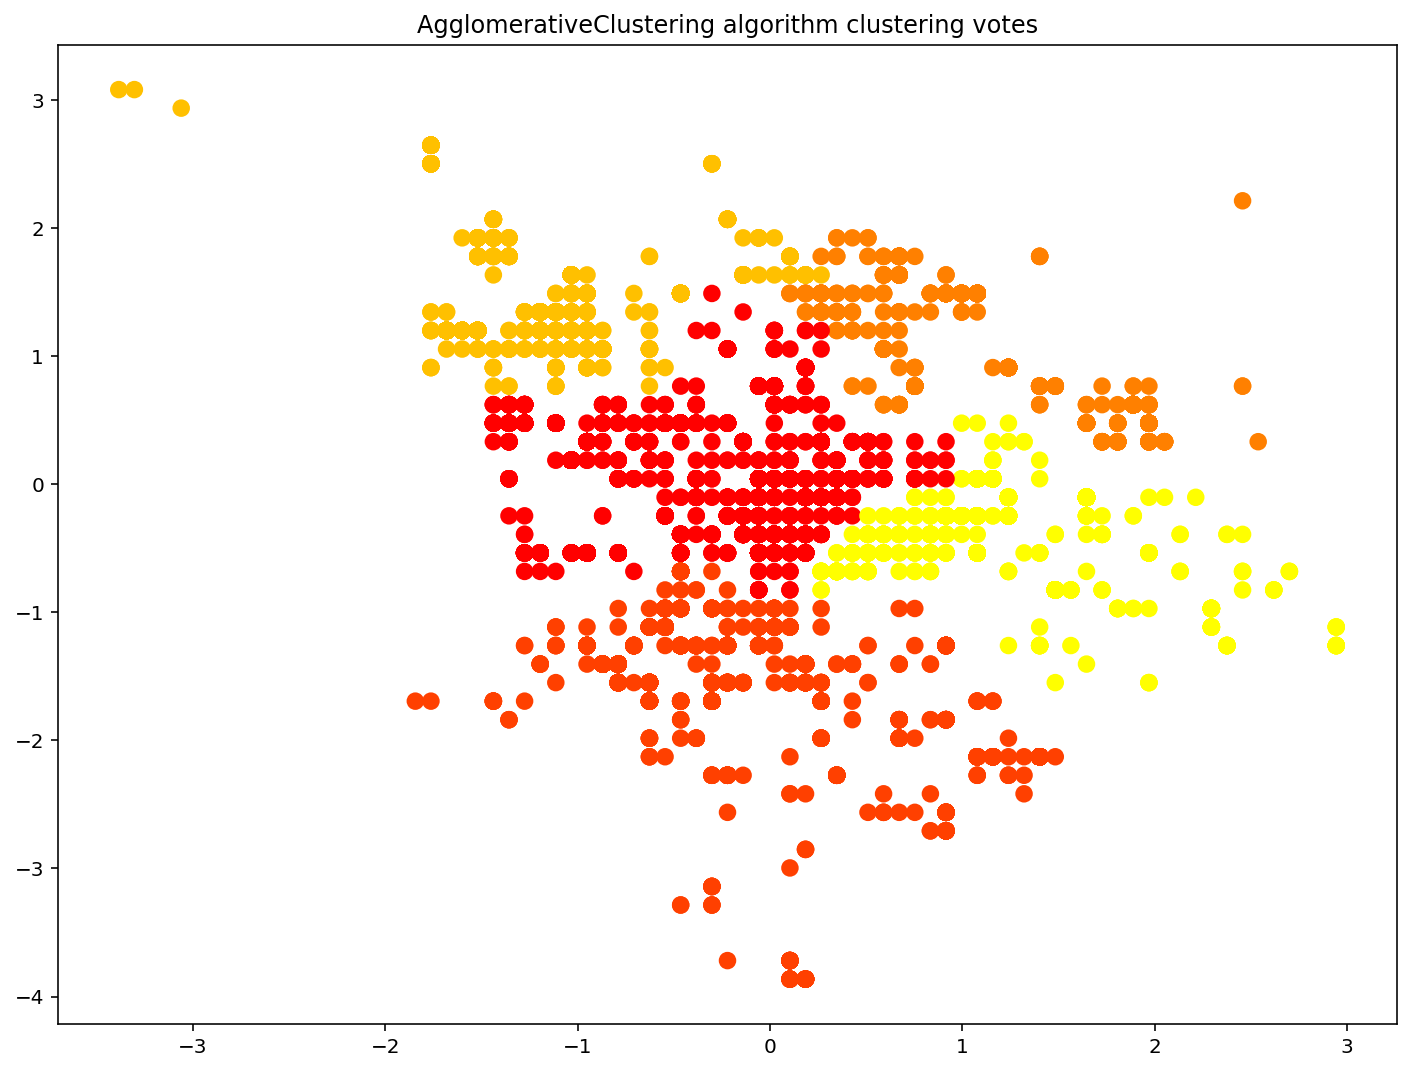

In [27]:
plt.scatter(X_sample_scaled[:, 0], X_sample_scaled[:, 1], c=AgglomerativeClustering_clusters,
            cmap='autumn', s=60)
plt.title('AgglomerativeClustering algorithm clustering votes')

# аналогично исследовать скопления голосов за и против отдельно

In [28]:
df_geo_positive = df_geo[df_geo['comment_class'] == 1]
df_geo_negative = df_geo[df_geo['comment_class'] == -1]

In [29]:
X_scaled_pos = scaler.fit_transform(df_geo_positive.loc[:,('x','y')])

In [30]:
X_scaled_neg = scaler.fit_transform(df_geo_negative.loc[:,('x','y')])

In [31]:
df__neg_sample = df_geo_negative.sample(n=10000)

In [32]:
X_scaled_sample_neg = scaler.fit_transform(df__neg_sample.loc[:,('x','y')])

### KMeans

In [33]:
n = 8

In [34]:
KMeans_clusters_pos = KMeans(n_clusters=n).fit_predict(X_scaled_pos)
KMeans_clusters_neg = KMeans(n_clusters=n).fit_predict(X_scaled_neg)

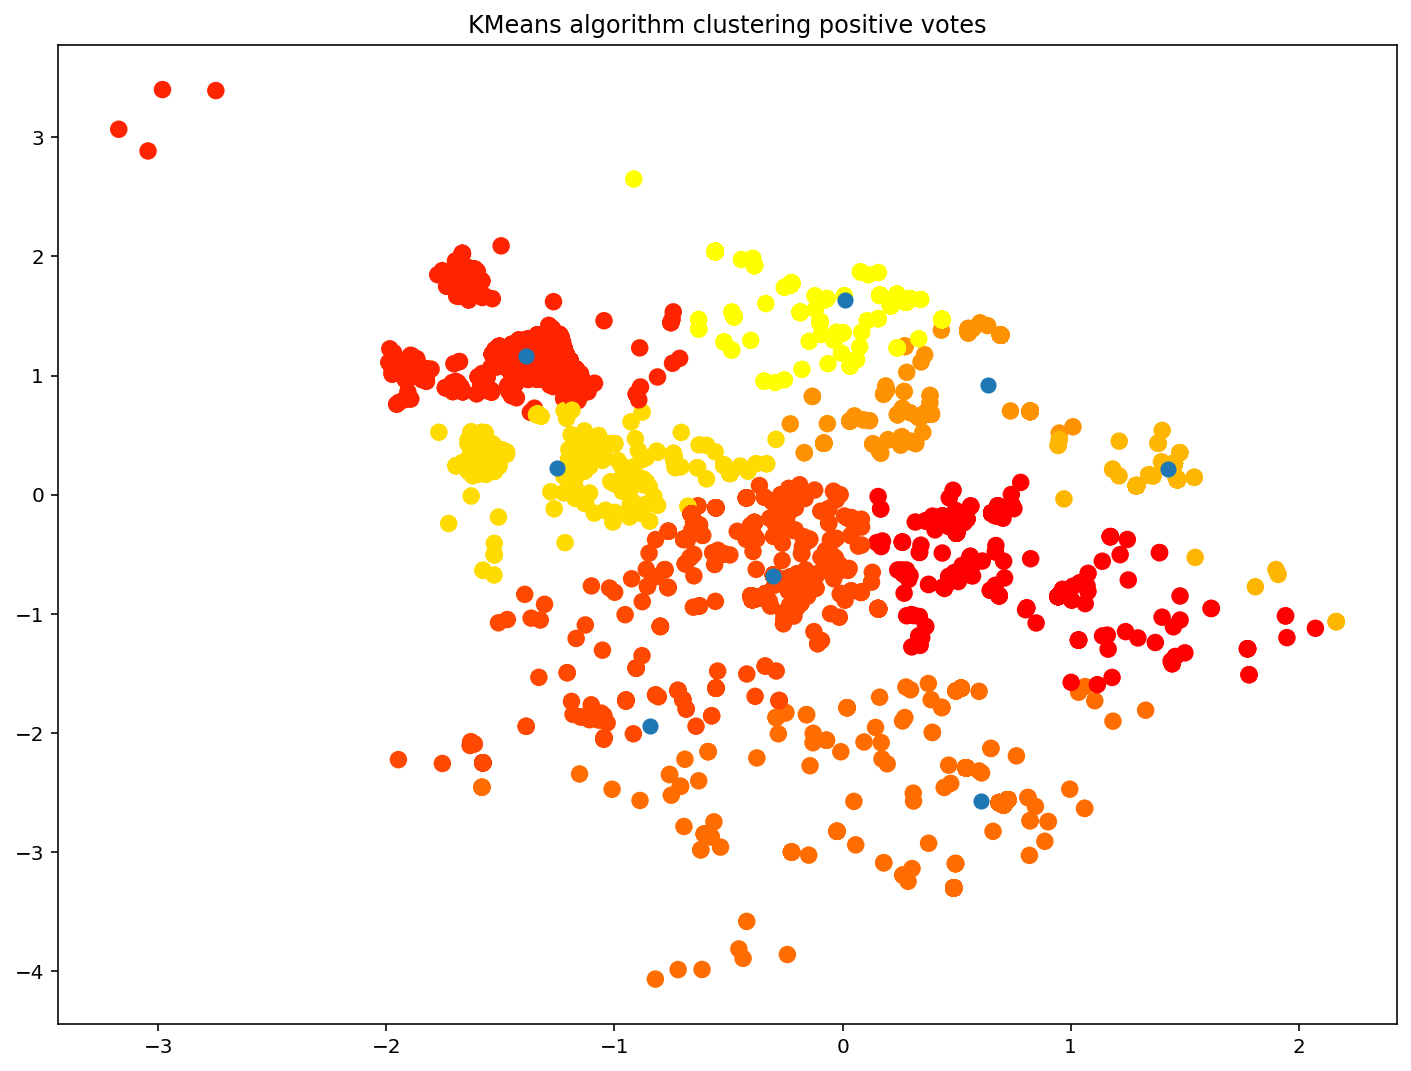

In [35]:
plt.scatter(X_scaled_pos[:, 0], X_scaled_pos[:, 1], c=KMeans_clusters_pos, cmap='autumn', s=60)
plt.title('KMeans algorithm clustering positive votes')
centers = KMeans(n_clusters=n).fit(X_scaled_pos).cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=50)

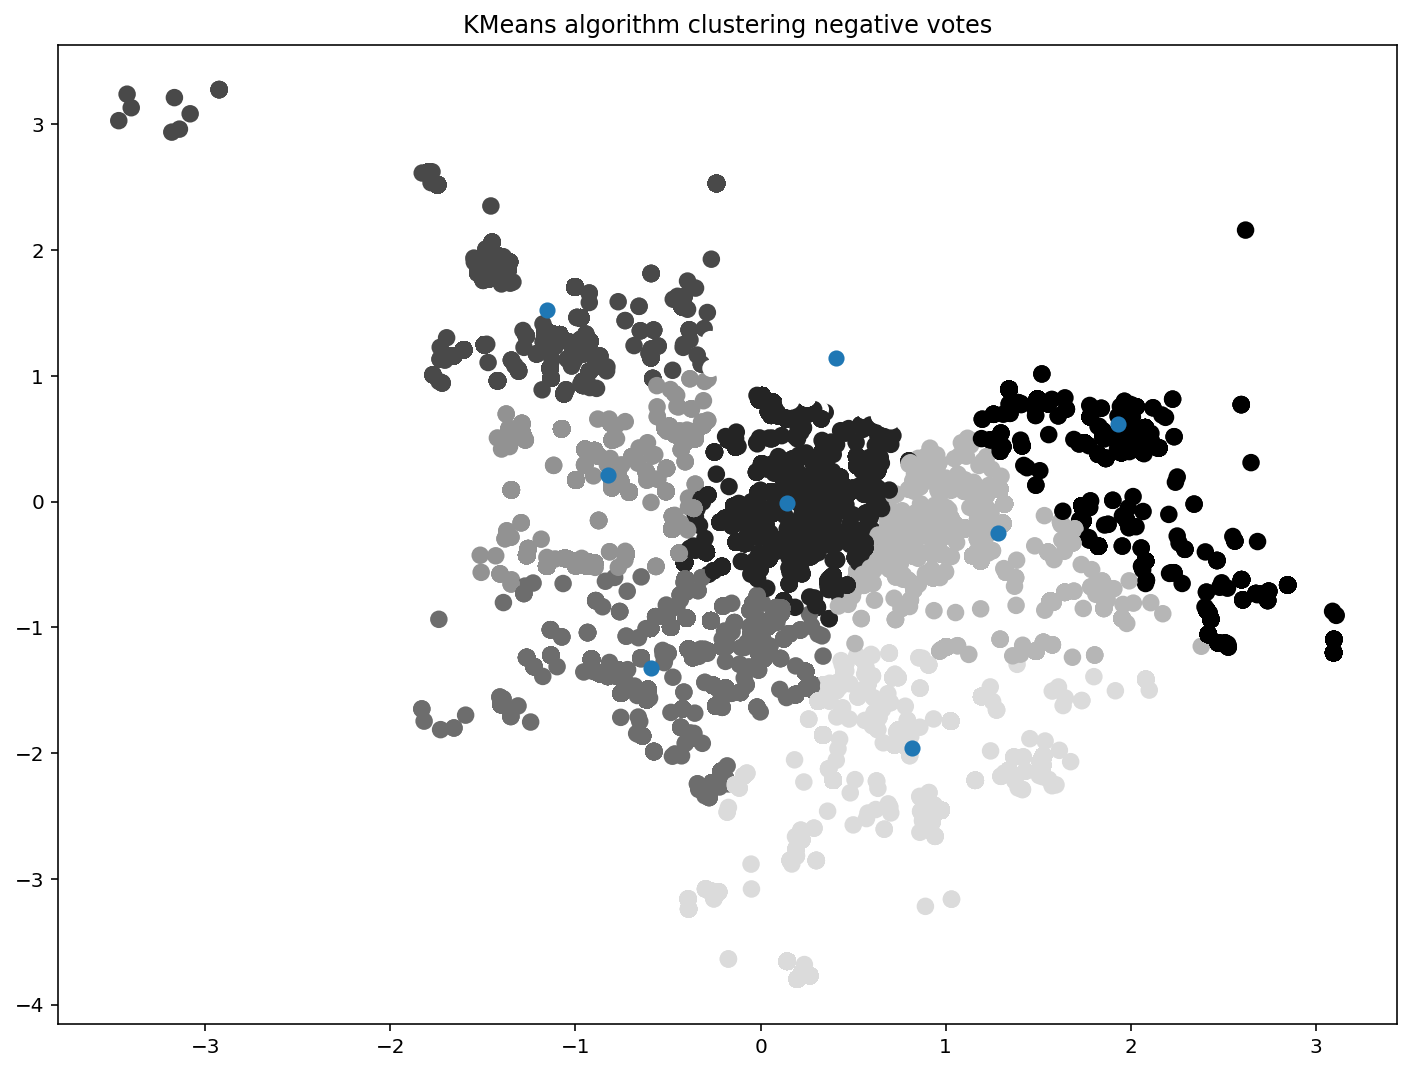

In [36]:
plt.scatter(X_scaled_neg[:, 0], X_scaled_neg[:, 1], c=KMeans_clusters_neg, cmap='gray', s=60)
plt.title('KMeans algorithm clustering negative votes')
centers = KMeans(n_clusters=n).fit(X_scaled_neg).cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=50)

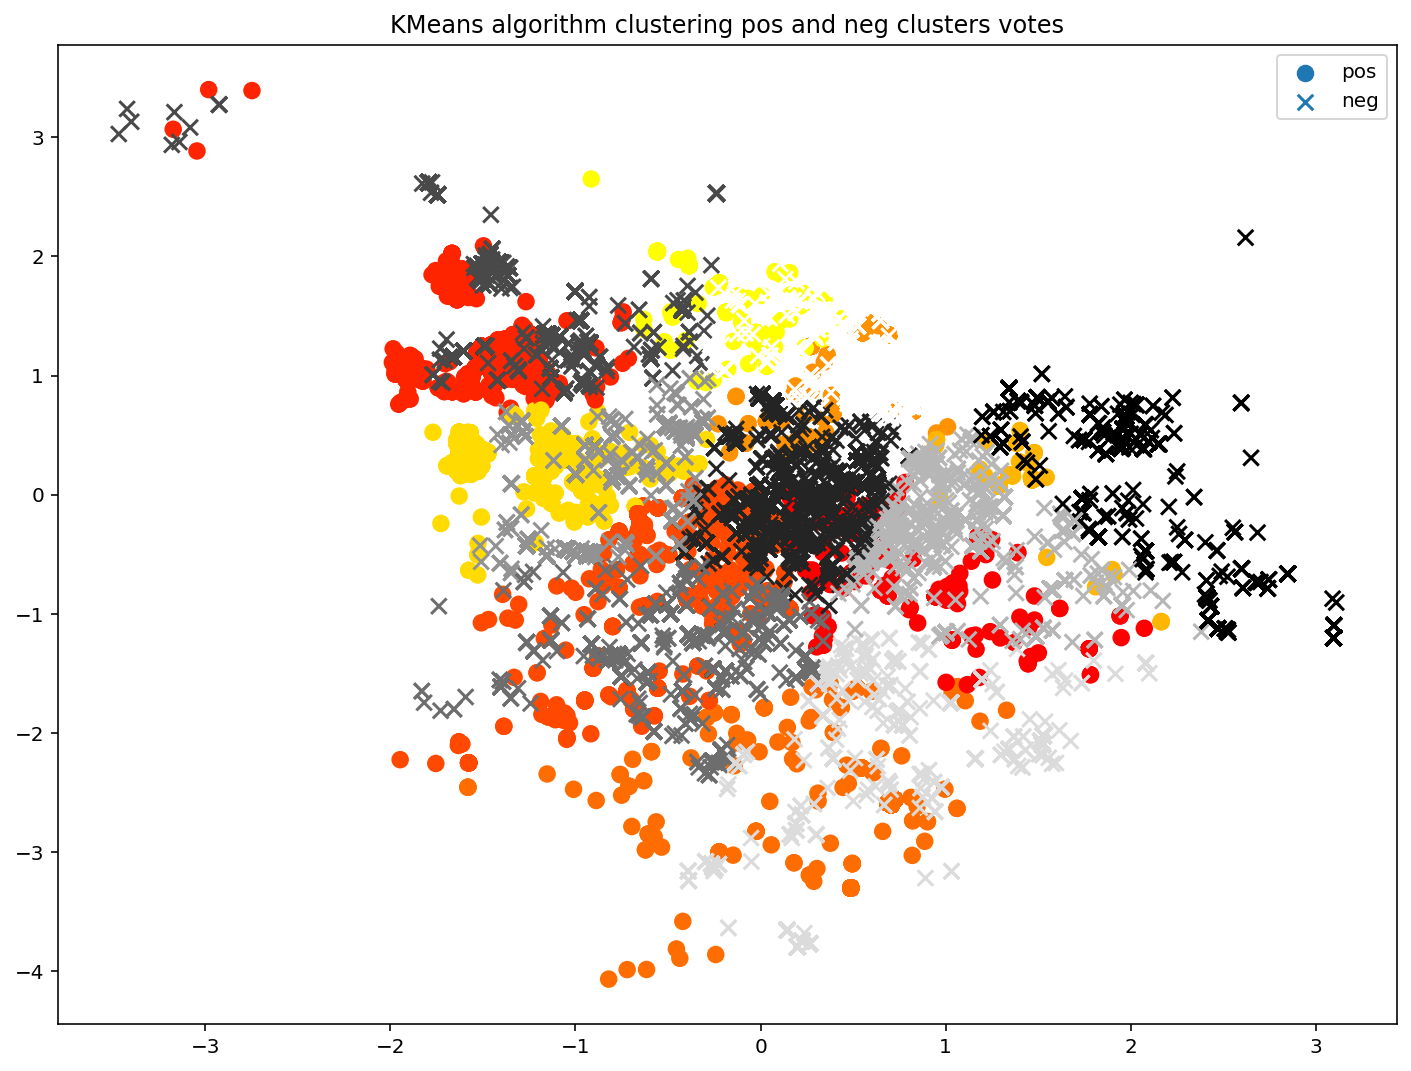

In [37]:
plt.scatter(X_scaled_pos[:, 0], X_scaled_pos[:, 1], c=KMeans_clusters_pos, cmap='autumn', s=60, label='pos')
plt.scatter(X_scaled_neg[:, 0], X_scaled_neg[:, 1], c=KMeans_clusters_neg, cmap='gray', s=60, label='neg', marker='x')
plt.title('KMeans algorithm clustering pos and neg clusters votes')
plt.legend()

### DBSCAN

In [38]:
DBSCAN_clusters_pos = DBSCAN(eps=0.1, min_samples=3).fit_predict(X_scaled_pos)
DBSCAN_clusters_neg = DBSCAN(eps=0.1, min_samples=3).fit_predict(X_scaled_neg)

Text(0.5, 1.0, 'DBSCAN algorithm clustering pos votes')

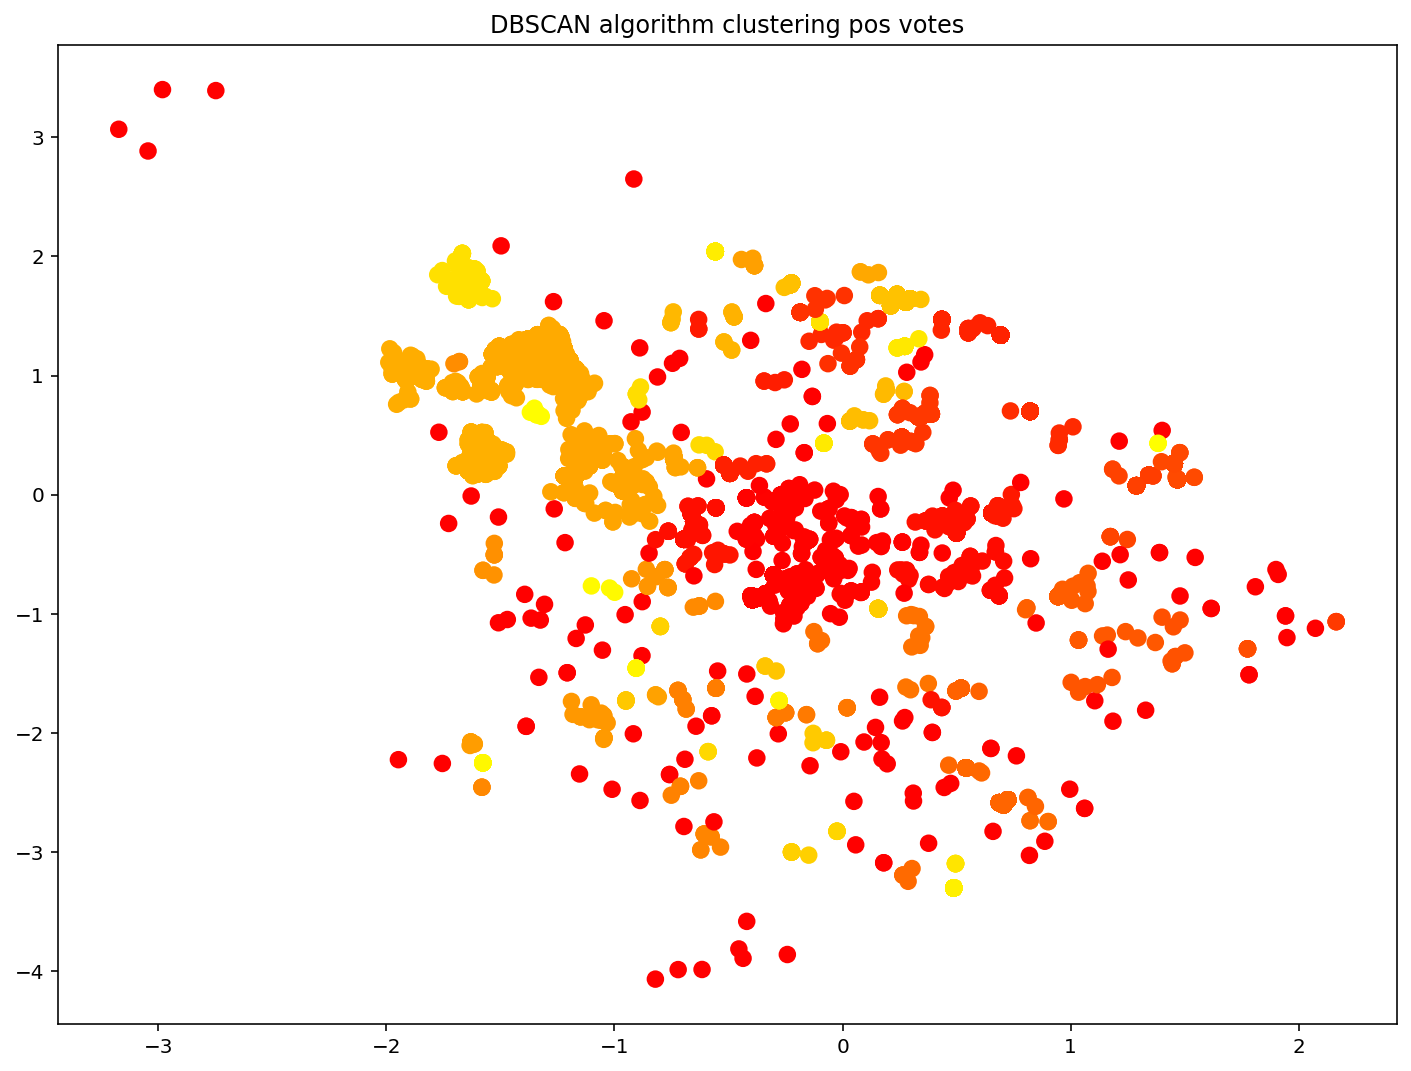

In [39]:
plt.scatter(X_scaled_pos[:, 0], X_scaled_pos[:, 1], c=DBSCAN_clusters_pos, cmap='autumn', s=60)
plt.title('DBSCAN algorithm clustering pos votes')

Text(0.5, 1.0, 'DBSCAN algorithm clustering neg votes')

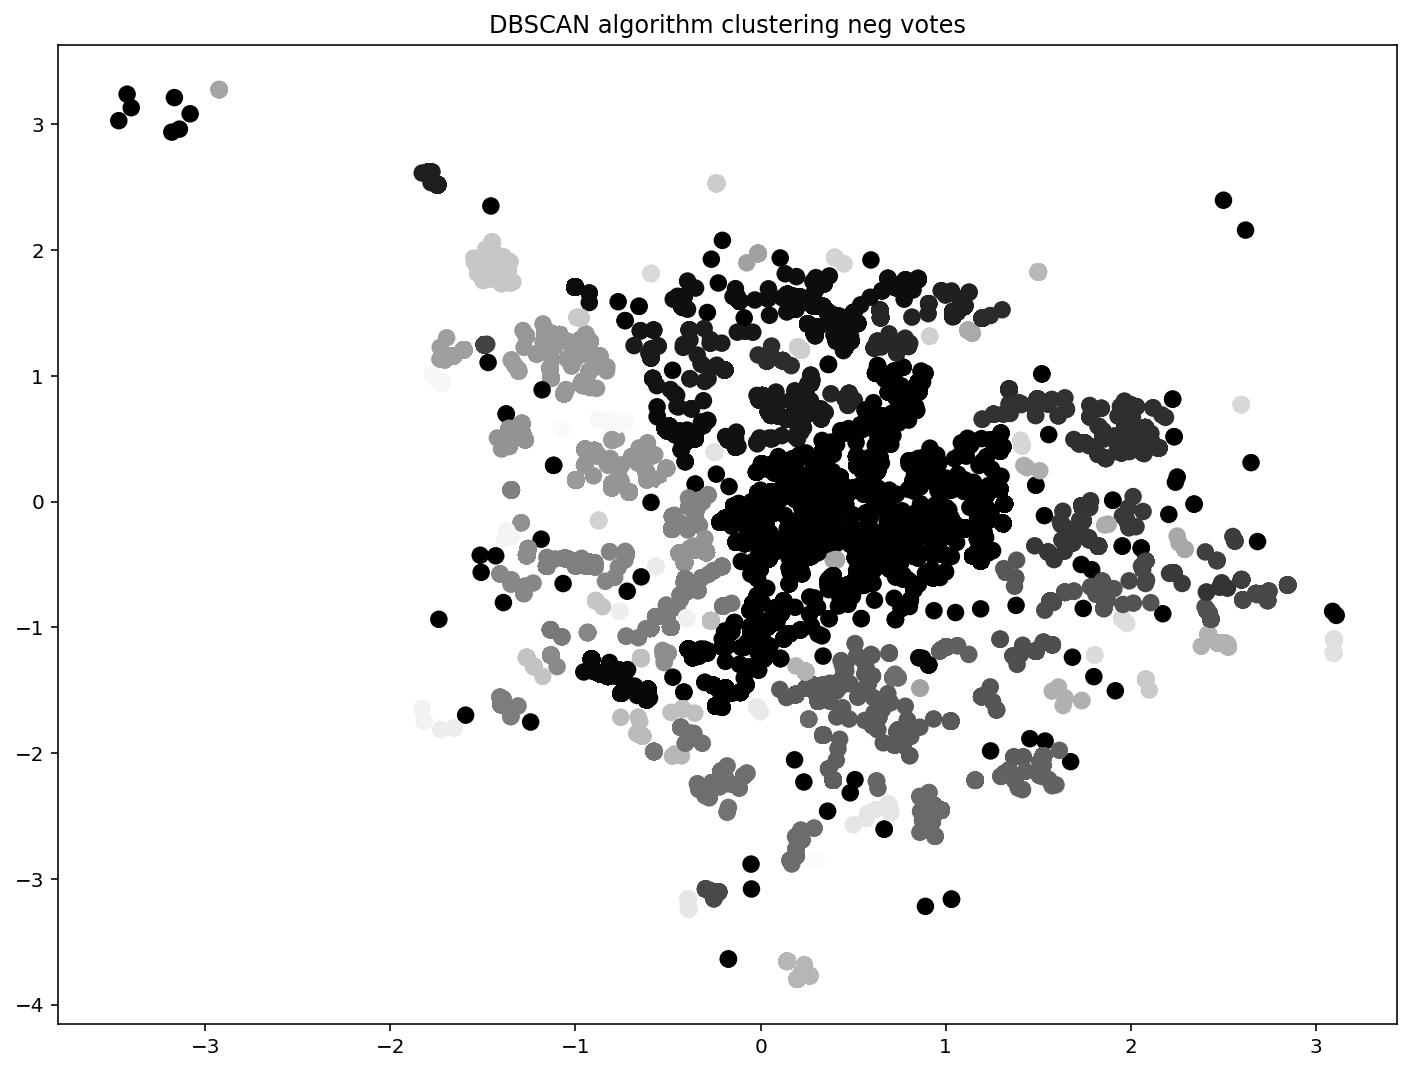

In [40]:
plt.scatter(X_scaled_neg[:, 0], X_scaled_neg[:, 1], c=DBSCAN_clusters_neg, cmap='gray', s=60)
plt.title('DBSCAN algorithm clustering neg votes')

### AffinityPropagation

In [41]:
# AffinityPropagation_clusters_pos = AffinityPropagation().fit_predict(X_scaled_pos)

In [42]:
# plt.scatter(X_scaled_pos[:, 0], X_scaled_pos[:, 1], c=AffinityPropagation_clusters_pos, cmap='autumn', s=60)
# plt.title('AffinityPropagation algorithm clustering pos votes')
# centers = AffinityPropagation.fit(X_scaled_pos).cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], s=50)

In [43]:
# AffinityPropagation_clusters_neg = AffinityPropagation().fit_predict(X_scaled_neg)

In [44]:
# plt.scatter(X_scaled_neg[:, 0], X_scaled_neg[:, 1], c=AffinityPropagation_clusters_neg, cmap='gray', s=60)
# plt.title('AffinityPropagation algorithm clustering neg votes')
# centers = AffinityPropagation.fit(X_scaled_neg).cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], s=50)

### AgglomerativeClustering

In [45]:
AgglomerativeClustering_clusters_pos = AgglomerativeClustering(n_clusters=n).fit_predict(X_scaled_pos)

Text(0.5, 1.0, 'AgglomerativeClustering algorithm clustering pos votes')

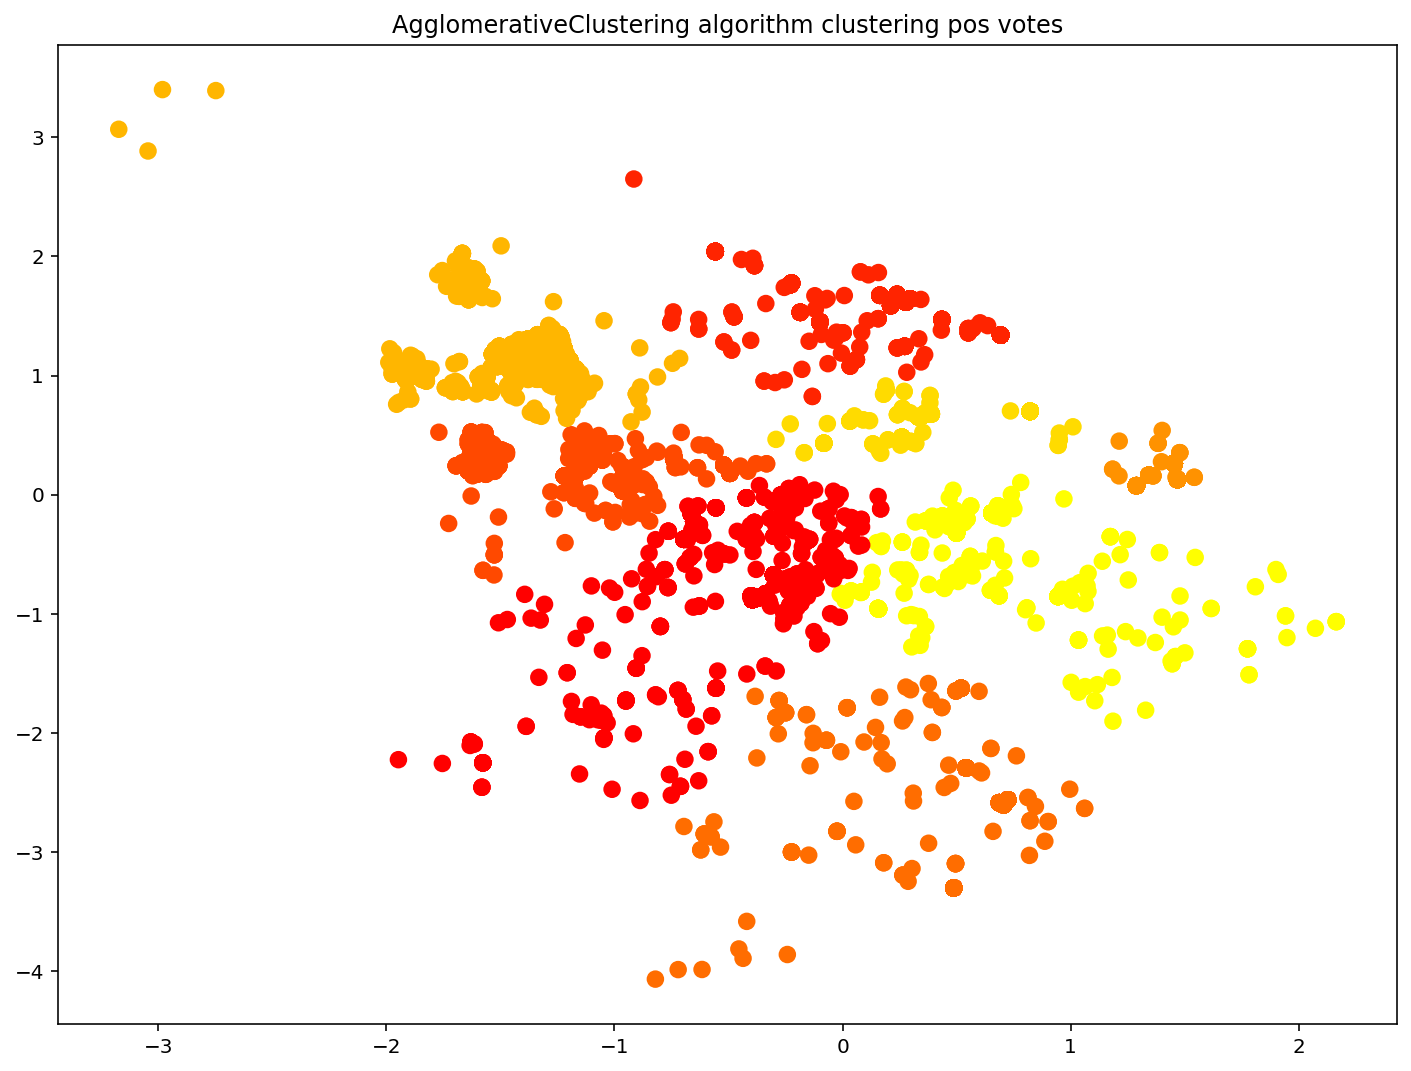

In [46]:
plt.scatter(X_scaled_pos[:, 0], X_scaled_pos[:, 1], c=AgglomerativeClustering_clusters_pos, cmap='autumn', s=60)
plt.title('AgglomerativeClustering algorithm clustering pos votes')

In [47]:
AgglomerativeClustering_clusters_neg = AgglomerativeClustering(n_clusters=n).fit_predict(X_scaled_sample_neg)

Text(0.5, 1.0, 'AgglomerativeClustering algorithm clustering neg votes')

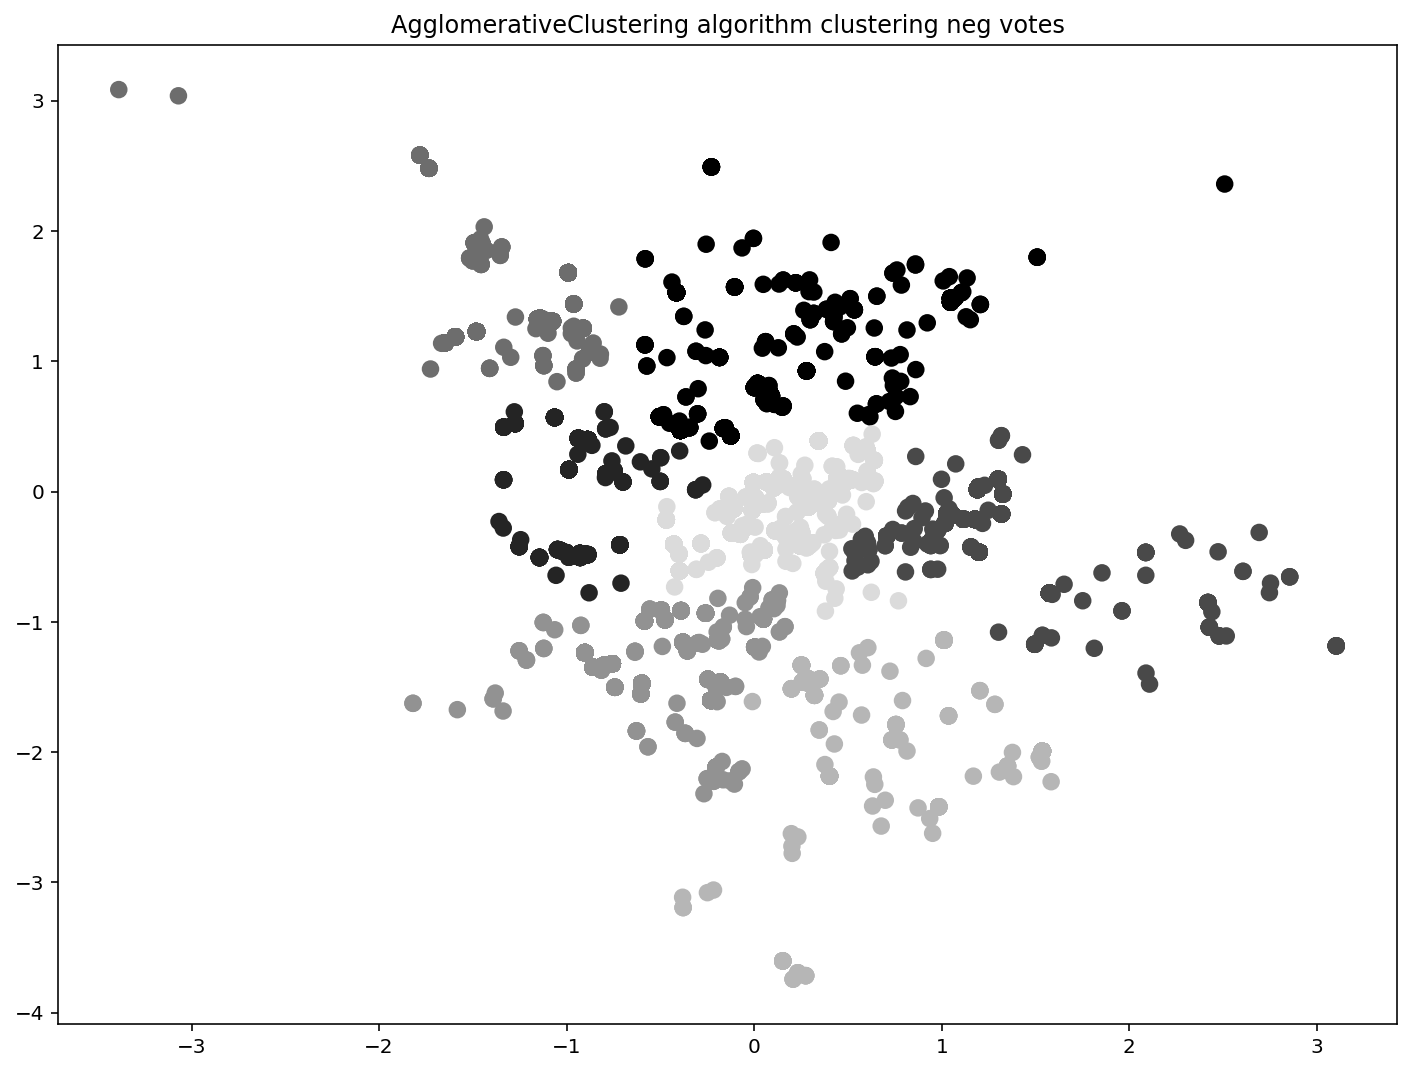

In [48]:
plt.scatter(X_scaled_sample_neg[:, 0], X_scaled_sample_neg[:, 1], c=AgglomerativeClustering_clusters_neg,
            cmap='gray', s=60)
plt.title('AgglomerativeClustering algorithm clustering neg votes')

# подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)

In [49]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

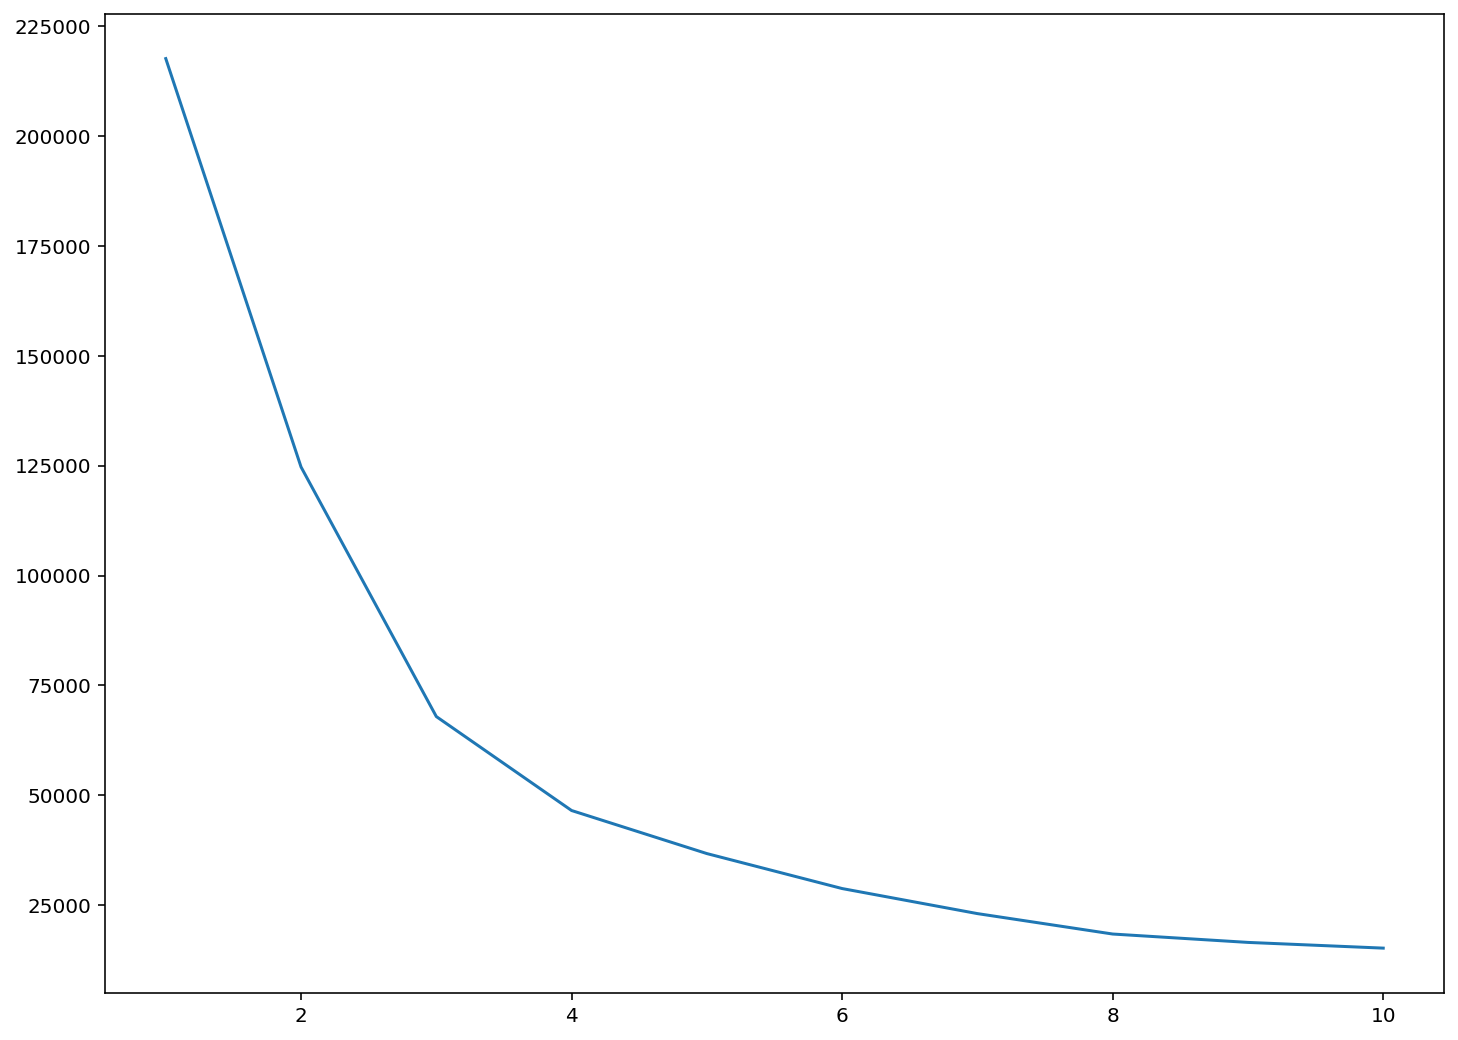

In [50]:
plt.plot(ks, k_inertia)

In [51]:
diff = np.diff(k_inertia)

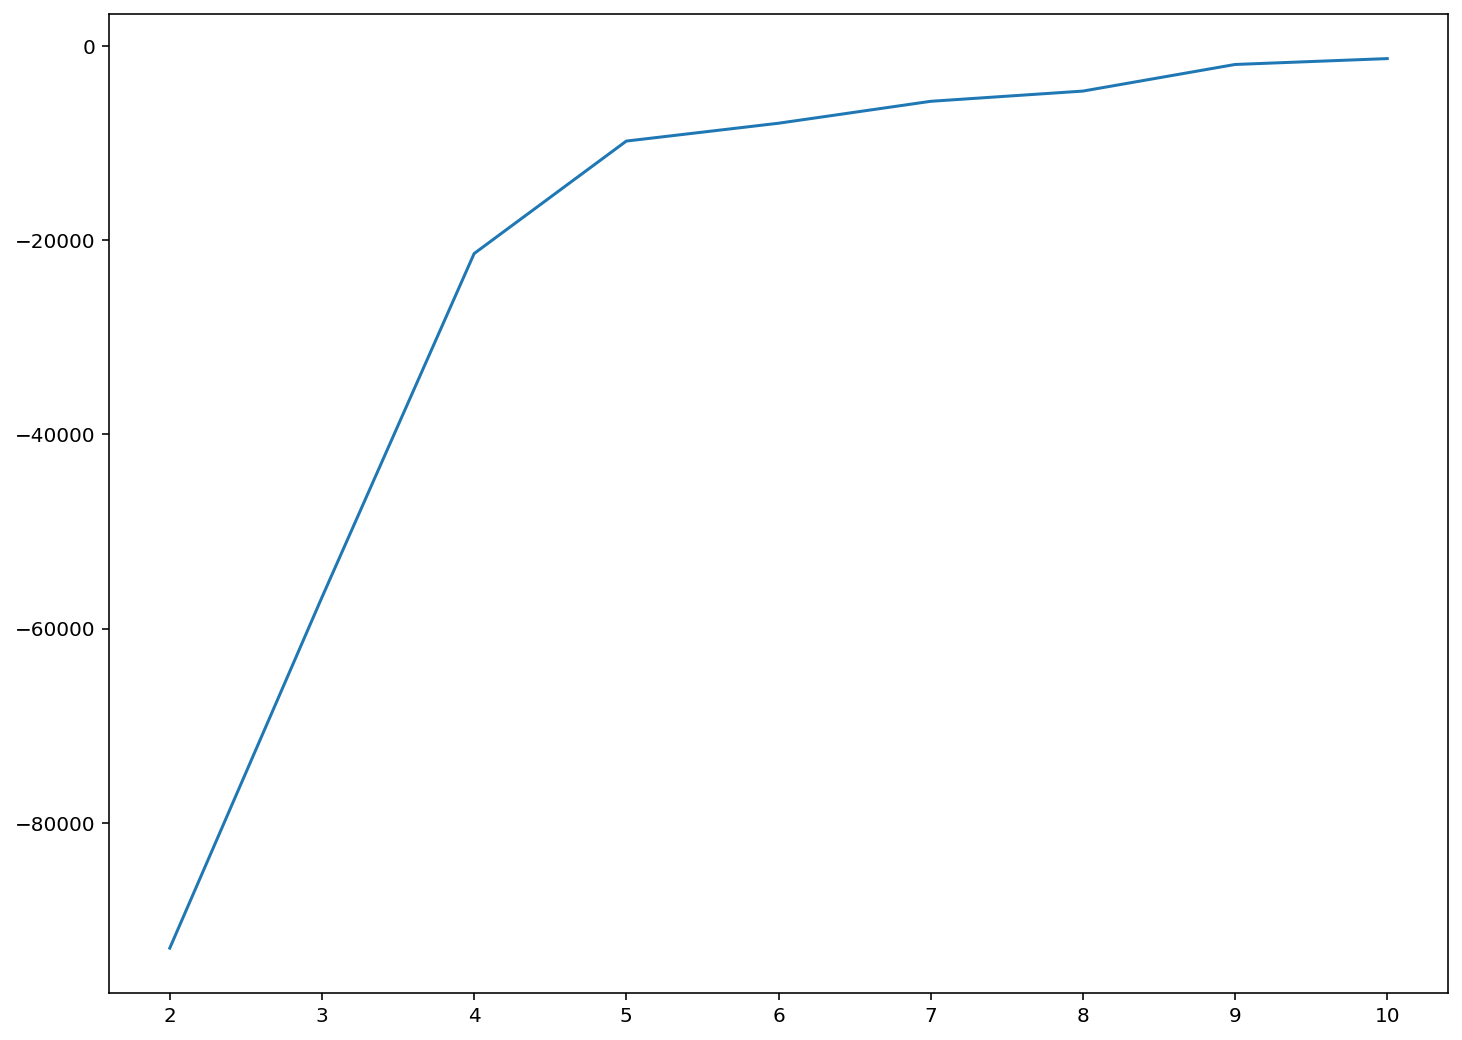

In [52]:
plt.plot(ks[1:], diff)

In [53]:
diff_r = diff[1:] / diff[:-1]

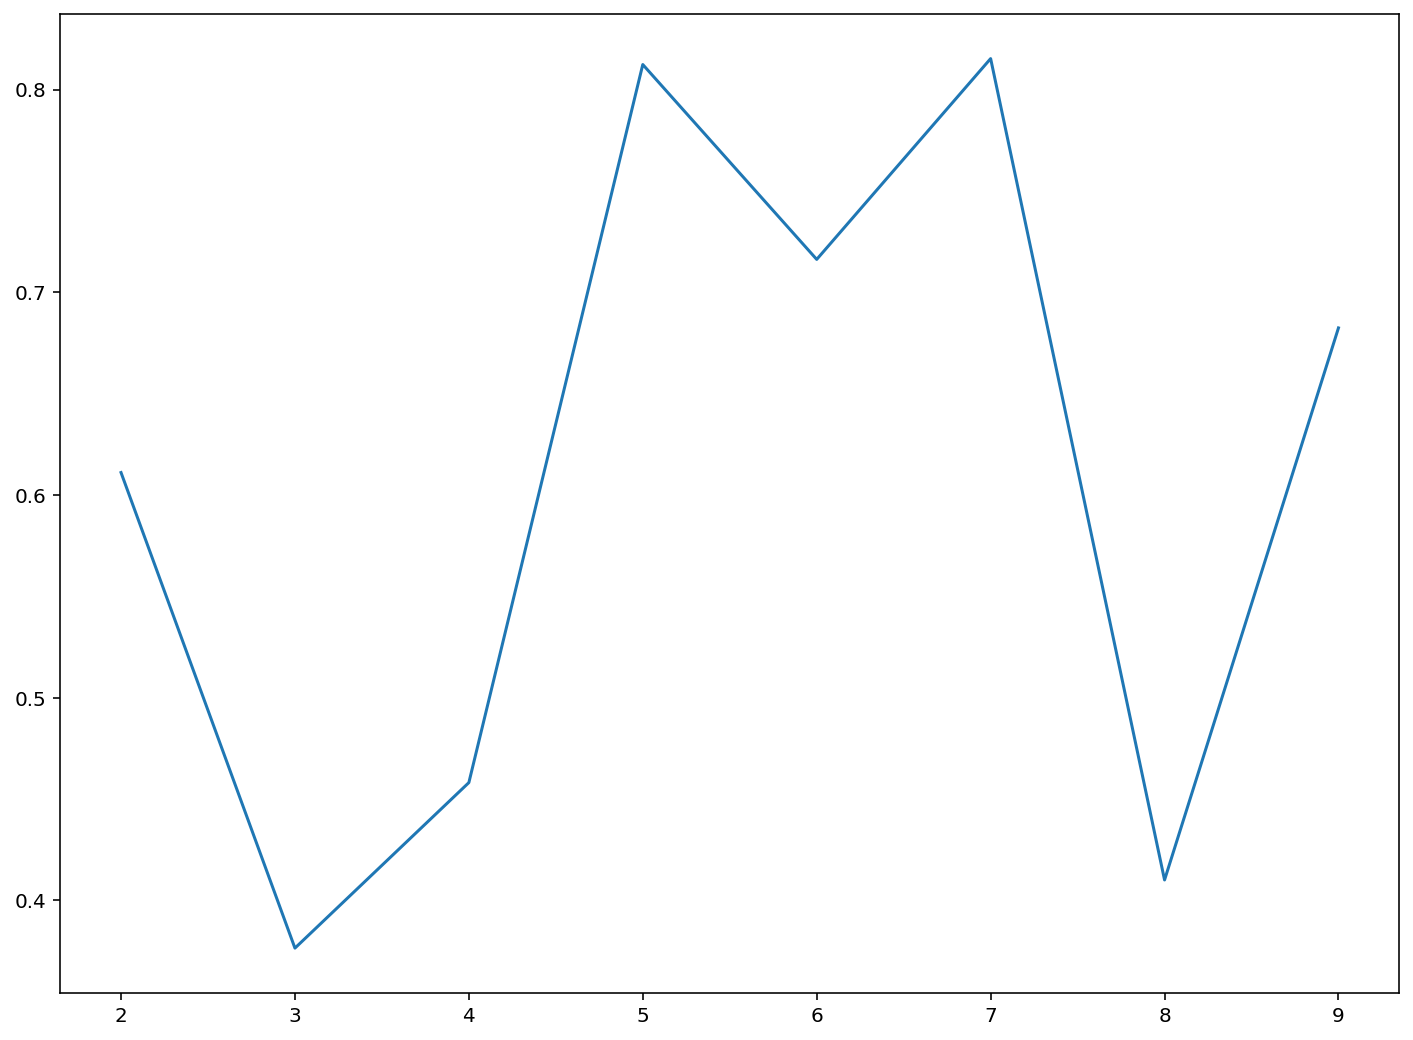

In [54]:
plt.plot(ks[1:-1], diff_r)

In [55]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3

In [56]:
### визульно на самом первом графике тоже в районе 3 кластеров происходит "перелом". 
### однако такое количество кластеров скорее всего слишком маленькое для такого крупного города, ка Москва. 
### значение количества кластеров 8 выглядит гораздо привлекательнее

# Дополнительные задания

### найти наиболее активные в голосовании районы (подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')

In [57]:
X = df_geo_comment.loc[:,('x','y', 'multiplier')]

In [58]:
X.x, X.y = X.x.round(2), X.y.round(2)

In [59]:
X_scaled_mult = scaler.fit_transform(X)

In [60]:
DBSCAN_clusters_mult = DBSCAN(eps=0.1, min_samples=3).fit_predict(X_scaled_mult)

Text(0.5, 1.0, 'DBSCAN algorithm clustering')

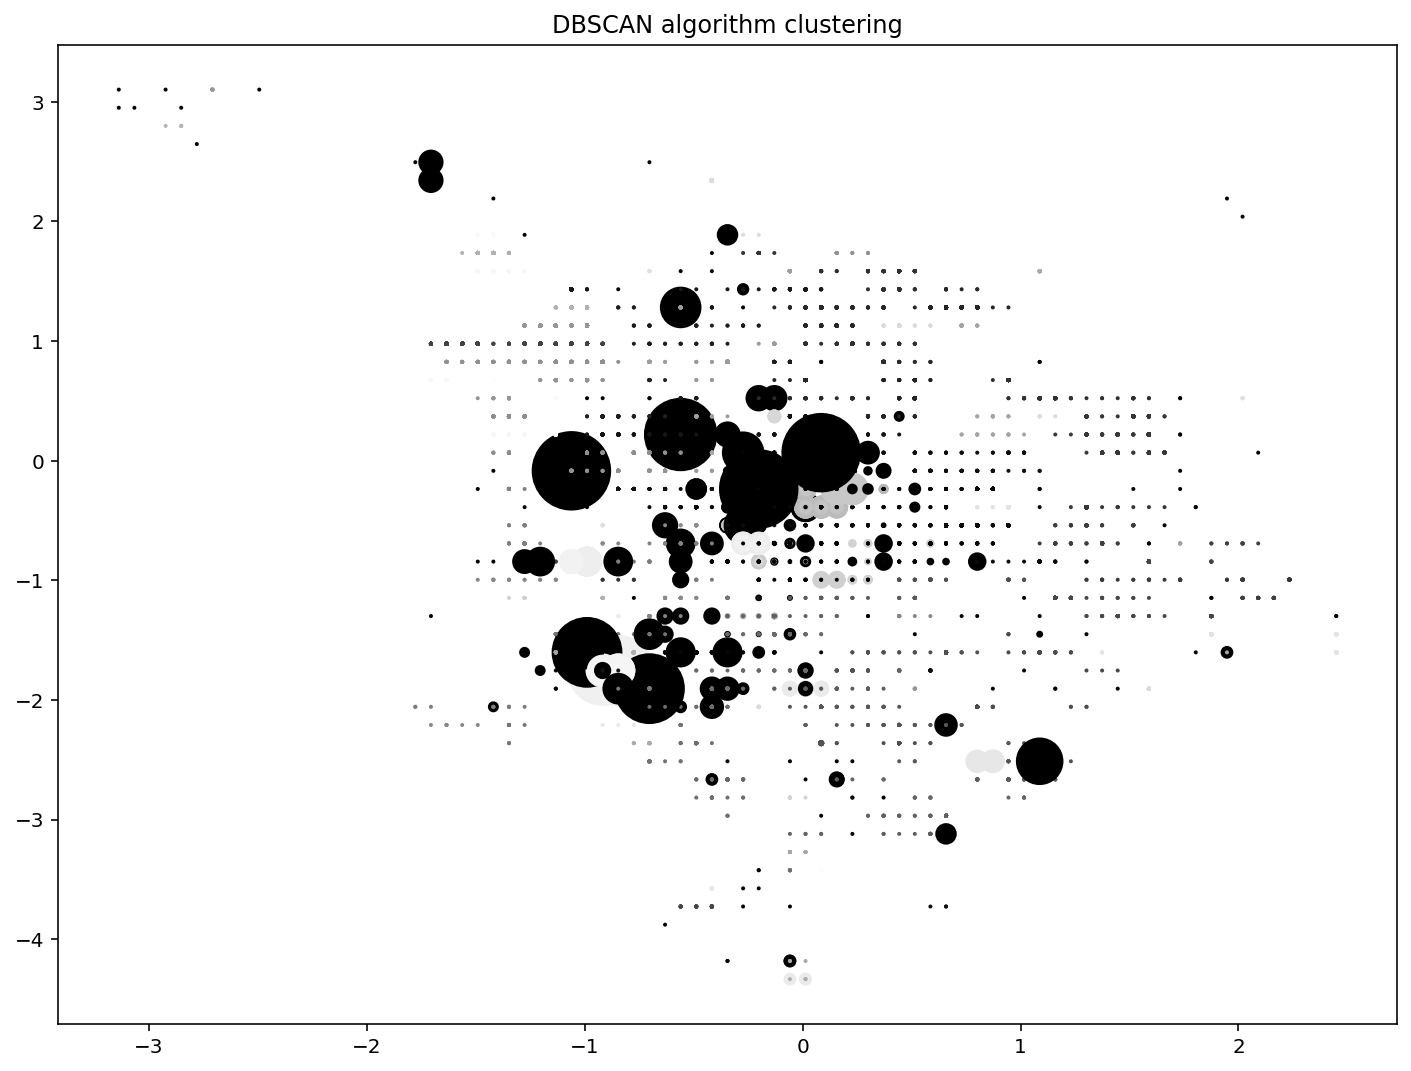

In [61]:
plt.scatter(X_scaled_mult[:, 0], X_scaled_mult[:, 1], c=DBSCAN_clusters_mult, 
            cmap='gray', s=df_geo_comment.multiplier)
plt.title('DBSCAN algorithm clustering')

PCA

In [62]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(n_components=2)

In [64]:
X_pca_2n_mult = pca.fit_transform(X)

In [65]:
X_pca_scaled_mult = scaler.fit_transform(X_pca_2n_mult)

In [66]:
DBSCAN_clusters_mult_pca = DBSCAN(eps=0.1, min_samples=3).fit_predict(X_pca_scaled_mult)

Text(0.5, 1.0, 'DBSCAN algorithm clustering')

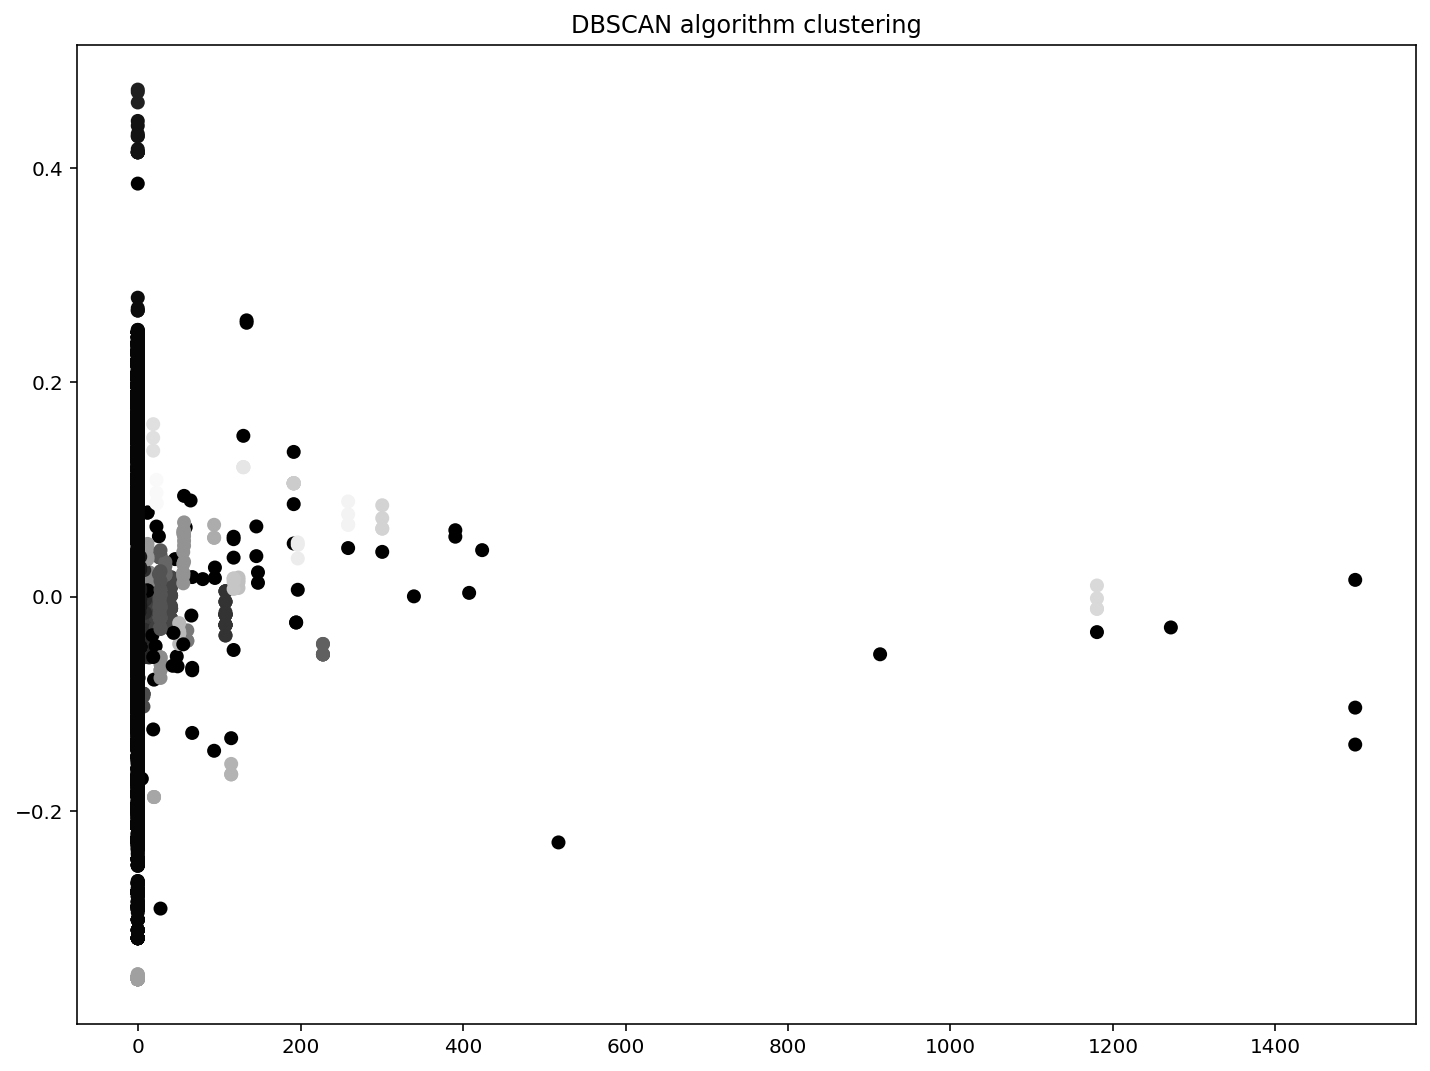

In [67]:
plt.scatter(X_pca_2n_mult[:, 0], X_pca_2n_mult[:, 1], c=DBSCAN_clusters_mult_pca, cmap='gray')
plt.title('DBSCAN algorithm clustering')

In [68]:
clusters_df = pd.DataFrame(DBSCAN_clusters_mult_pca)

In [69]:
output = pd.concat([X.loc[:,('x','y')],clusters_df], ignore_index=True, axis=1)

Text(0.5, 1.0, 'DBSCAN algorithm clustering')

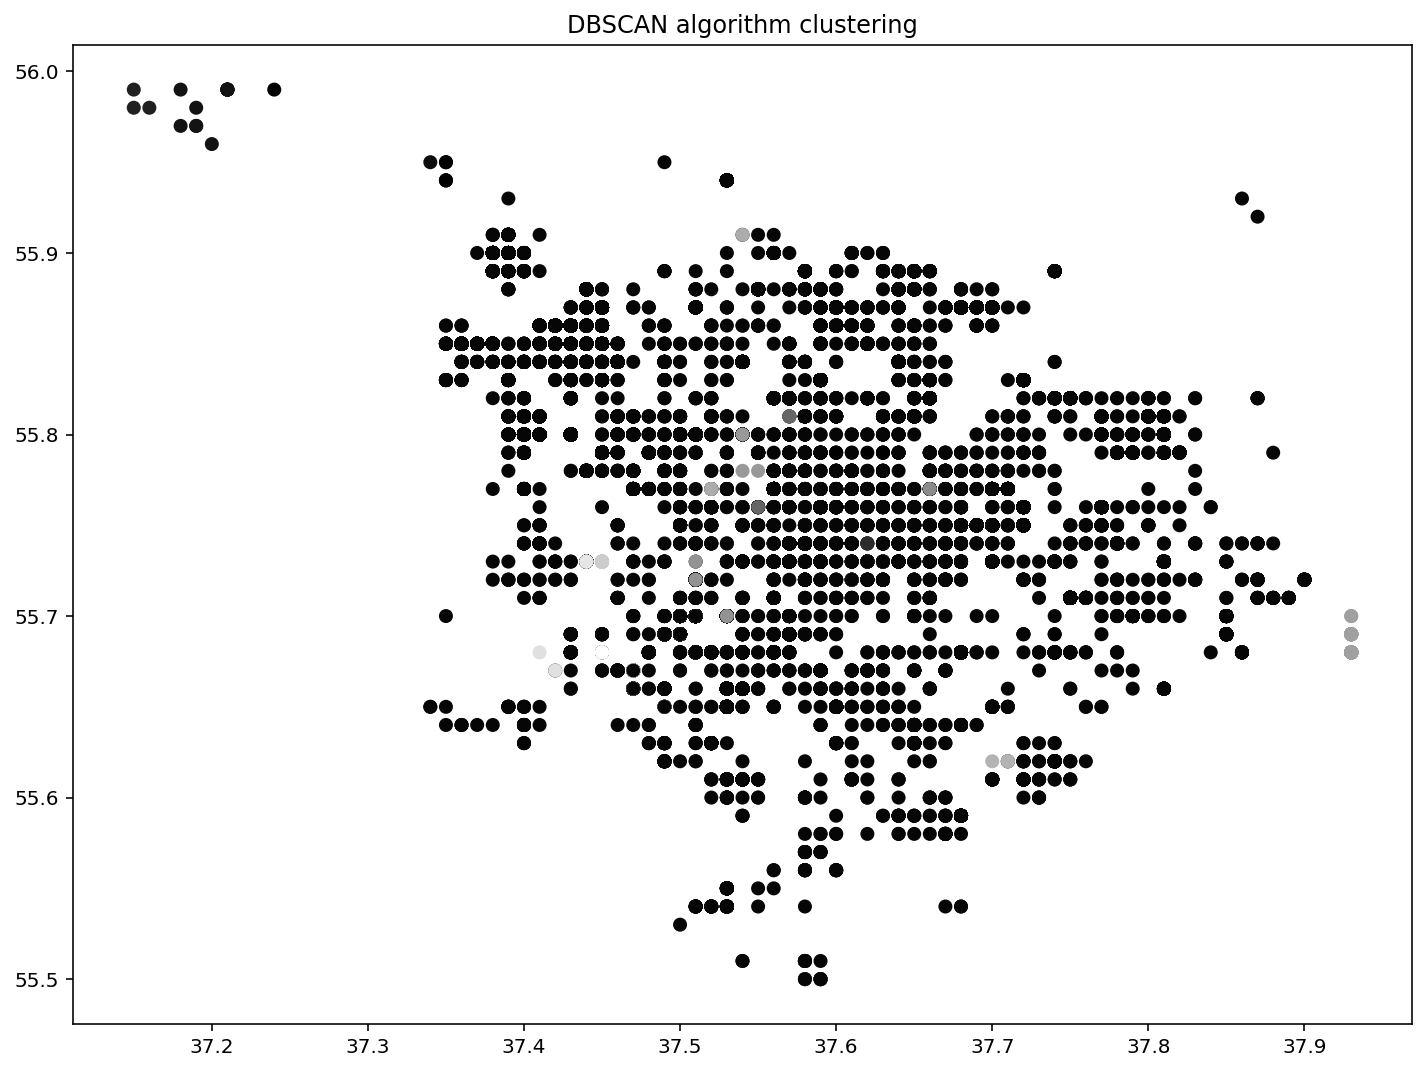

In [70]:
plt.scatter(output[0], output[1], c=output[2], cmap='gray')
plt.title('DBSCAN algorithm clustering')

### для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [71]:
### пока пороху не пробовал. :( Жду блока по nlp. 